<a href="https://colab.research.google.com/github/alvaroguibe/gestion-de-carteras/blob/main/TEMA_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEORIA DE GESTIÓN DE CARTERAS**
A la hora de configurar una cartera existen múltiples modelos que permiten configurar las mismas. Desde los más simples dónde el número de hipótesis a realizar sobre los activos son mínimas como podría ser una estrategia de diversificación Equal-Weighted  hasta los complejos chasta los complejos modelos actuales de asignación. Veremos algunos de esto modelos y las bases que los sustentan a lo largo de este tema.

#1. **Aversión al Riesgo y Teoría de la Utilidad**
Podemos diferenciar tres aproximaciones al riesgo o incertidumbre de los activos por parte de los inversores:
-Aversión al riesgo: en general un inversor en igualdad de rentabilidades esperadas tenderá a optar por aquel activos con menor riesgo.
-Neutral al riesgo: la única variable relevante para el inversor es la rentabilidad esperada. Elegirá el activo de mayor rentabilidad con independencia de que su riesgo sea mayor.
-Búsqueda del riesgos: prefieren aquellos con un potencial de ganancia mayor incluso cuando su rentabilidad esperada sea menor.

En general los modelos de selección de carteras van a asumir que el inversor es averso al riesgo. Sin embargo el grado de aversión al riesgo puede diferir entre individuos.

Podemos decir que un inversor prefiere un activo frente a otro porque le genera mayor satisfacción o lo que en economía se denomina una mayor **utilidad**.

En general aunque la utilidad no tenga una unidad de medición si se puede tratar de asignar una cuantificación teórica cuyo objetivo sea crear un marco teórico que permita comparar opciones y analizar cuál preferiría un inversor. Por ejemplo, en el ámbito de la gestión de carteras es común asumir que la función de utilidad de un inversor depende exclusivamente de dos factores:
- la rentabilidad esperada: $E(μ)$. A más rentabilidad más utilidad.
- el riesgo **σ**. A más riesgo menos utilidad.

y que la utilidad generada por el activo toma la siguiente forma funcional (utilidad cuadrática):
$$U(μ,σ)=E(\mu)-\frac{λ}{2} \sigma^2$$
dóne $\lambda$ es un parámetro de aversión al riesgo. Cuánto mayor sea este parámetro más averso al riesgo es el inversor.

Se denomina curva de indiferencia a las combinaciones de rentabilidad-riesgo que generan la misma utilidad para el inversor. Es decir los puntos de la misma curva de indiferencia generan la misma utilida y por ende le son indiferentes al inversor. Podemos ver algunas características de las curvas de indiferencia:

- pendiente positiva: para mantener el mismo nivel de utilidad, al aumentar el riesgo debe aumentar su rentabilidad esperada.
- no se cruzan, dado que de hacerlo habría inconsistencias en las preferencias.
- convexidad al origen: según aumenta el riesgo cada vez se exige más rentabilidad por cada punto adicional de volatilidad.
-mayor utilidad cuanto más arriba y a la izquierda se situa la curva de indiferencia. Para el mismo nivel de volatilidad generá más satisfacción la cartera con mayor rendimiento esperado.






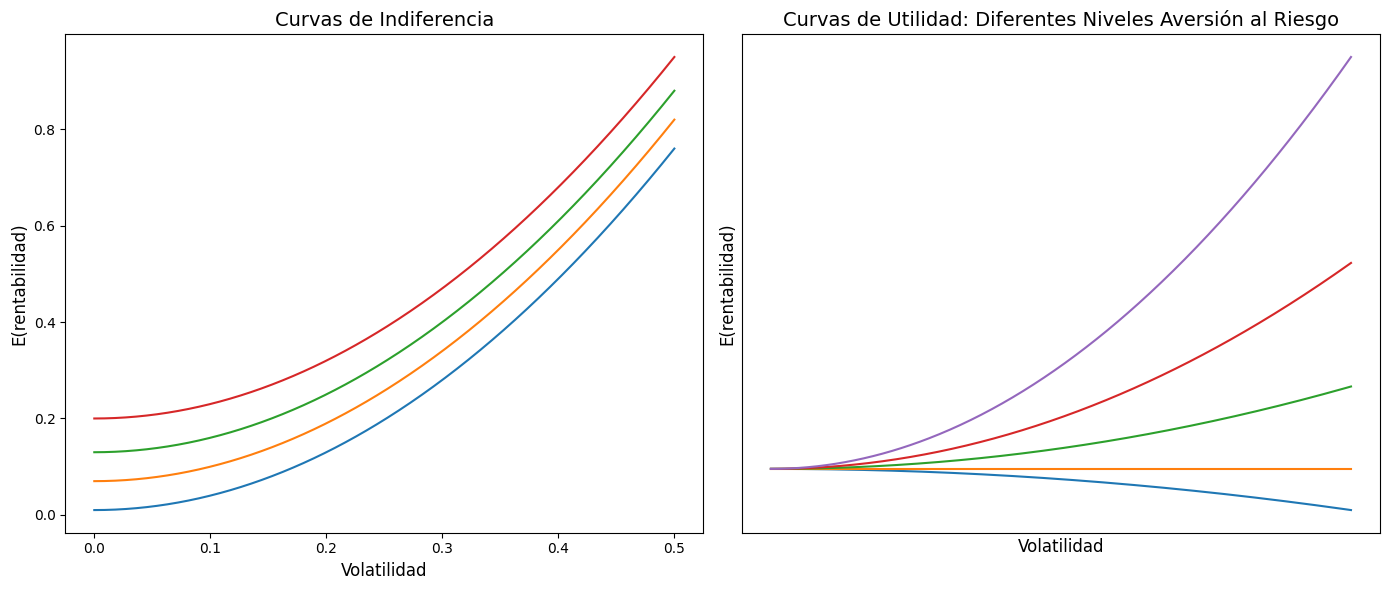

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para la función de utilidad
lambda_risk = 6  # Aversión al riesgo
U_levels = [0.01, 0.07, 0.13, 0.2]  # Diferentes niveles de utilidad
sigma = np.linspace(0, 0.5, 500)  # Volatilidad (σ)

# Parámetros para las curvas con diferentes niveles de aversión al riesgo
lambdas = [-1, 0, 2, 5,10]  # Poco, moderado y alto riesgo
U_level_fixed = 0.05  # Nivel de utilidad constante para todas las curvas


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico: curvas de indiferencia estándar
for U in U_levels:
    expected_return = U + (lambda_risk / 2) * sigma**2
    axs[0].plot(sigma, expected_return, label=f'U = {U:.2f}')
axs[0].set_title("Curvas de Indiferencia", fontsize=14)
axs[0].set_xlabel("Volatilidad", fontsize=12)
axs[0].set_ylabel("E(rentabilidad)", fontsize=12)
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y

# Segundo gráfico: curvas con diferentes niveles de aversión al riesgo
for lam in lambdas:
    expected_return = U_level_fixed + (lam / 2) * sigma**2
    axs[1].plot(sigma, expected_return, label=f'Aversión al riesgo: λ = {lam}')
axs[1].set_title("Curvas de Utilidad: Diferentes Niveles Aversión al Riesgo", fontsize=14)
axs[1].set_xlabel("Volatilidad", fontsize=12)
axs[1].set_ylabel("E(rentabilidad)", fontsize=12)
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y

# Ajustar diseño
plt.tight_layout()
plt.show()


Veamos un modelo muy básico de elección de una cartera por parte del inversor.

Imaginemos que sólo hay dos activos para invertir la tasa libre de riesgo que genera una rentabilidad $r_l$ y un activo con riesgo cuya rentabilidad esperada es $E(r_a)$. El riesgo del activo libre de riesgo es nulo, mientras que el del activo con riesgo supongamos que es $\sigma_a$.
Podemos ver que si llamamos $w_l$ y $w_a$ al porcentaje de la cartera invertido en cada activo, la rentabilidad y volatilidad esperada de la cartera agregada serán:
- $E(R_{cartera})=w_l·r_l+w_a·E(r_a)$
- $\sigma_{cartera}=w_a·\sigma_a$

Por tanto el inversor (asumiendo que no puede apalancarse ni vender en corto) podría elegir cualquier combinación de pesos que se encontra dentro de la línea definida por:
$$E(R_{cartera})=r_l+\frac{E(r_a)-r_f}{\sigma_a}\sigma_{cartera}$$


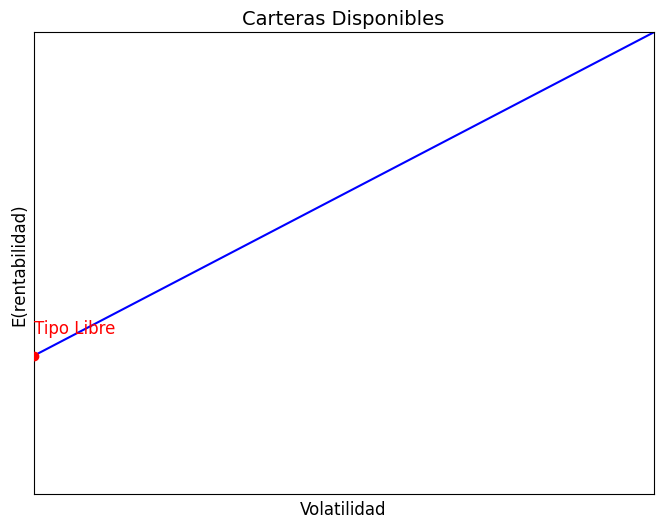

In [ ]:
# @title
# Parámetros para la CAL
sigma = np.linspace(0, 0.15, 500)  # Volatilidad (σ)
  # Aversión al riesgo
r_l = 0.03  # Rentabilidad libre de riesgo (intercepto en Y)
r_a=0.10 #rentabilidad cartera mercado
sigma_a=0.15 #volatilidad cartera de mercado
r_c = r_l+(r_a-r_l)/sigma_a*sigma

# Crear el gráfico con la curva de utilidad lineal
plt.figure(figsize=(8, 6))

# Graficar la línea de utilidad lineal
plt.plot(sigma, r_c, color='blue')

# Añadir un punto y texto para el intercepto en Y
plt.scatter(0, r_l, color='red', zorder=5)  # Punto en (0, r_f)
plt.text(0, r_l +0.005, "Tipo Libre", color='red', fontsize=12)

# Personalización del gráfico
plt.title("Carteras Disponibles", fontsize=14)
plt.xlabel("Volatilidad", fontsize=12)
plt.ylabel("E(rentabilidad)", fontsize=12)
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y
plt.xlim(0, 0.15)
plt.ylim(0, 0.10)

# Mostrar gráfico
plt.show()


Cuando ese activo con riesgo representa el mercado, es línea se conoce como **"Capital Allocation Line -CAL"**.

¿Cuál de estas carteras elegiría el inversor? **La que le genere mayor utilidad**. Para ello identifiquemos sus curvas de indiferencia y analizamos la carteras potencialmente invertibles:



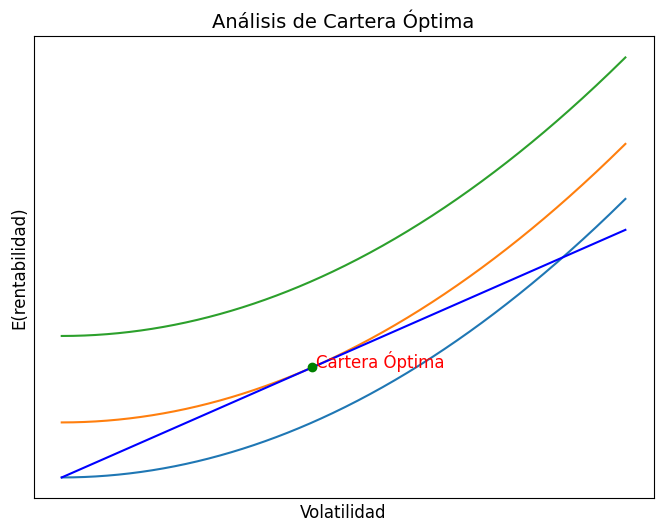

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para la función de utilidad
lambda_risk = 7  # Aversión al riesgo

sigma = np.linspace(0, 0.15, 500)  # Volatilidad (σ)
  # Aversión al riesgo
r_l = 0.03  # Rentabilidad libre de riesgo (intercepto en Y)
r_a=0.10 #rentabilidad cartera mercado
sigma_a=0.15 #volatilidad cartera de mercado
r_c = r_l+(r_a-r_l)/sigma_a*sigma
sigma_opt=(r_a-r_l)/sigma_a/lambda_risk
r_opt=r_l+(r_a-r_l)/sigma_a*sigma_opt
u_opt=(r_opt-(lambda_risk / 2) * sigma_opt**2)
U_levels = [0.03, u_opt, 0.07]  # Diferentes niveles de utilidad


# Generar las curvas de indiferencia
plt.figure(figsize=(8, 6))

for U in U_levels:
    expected_return = U + (lambda_risk / 2) * sigma**2  # Resolver para E(R)
    plt.plot(sigma, expected_return, label=f'U = {U:.2f}')
# Graficar la línea de utilidad lineal
plt.plot(sigma, r_c, color='blue')

# Crear el gráfico con la curva de utilidad lineal


# Personalización del gráfico
plt.title("Análisis de Cartera Óptima", fontsize=14)
plt.xlabel("Volatilidad", fontsize=12)
plt.ylabel("E(rentabilidad)", fontsize=12)
plt.scatter(sigma_opt, r_opt, color='green', zorder=5)
plt.text(sigma_opt + 0.001, r_opt, "Cartera Óptima",
         color='red', fontsize=12)

plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y

plt.show()

Como vemos la cartera óptima es aquella cartera que cumple dos condiciones:
- es factible, es decir está dentro la línea de carteras posibles (CAL)
- maximiza la utilidad, es decir toca a la curva de indiferencia de mayor utilidad.

Ante de introducir el primer modelo de selección de carteras recordemos algunos resultados fundamentales de las cartera que contienen **n** activos:

**Rentabilidad Esperada de la Cartera**

La media de la rentabilidad esperada de una cartera, denotada como $E(R_p)$, se calcula como una combinación ponderada de las rentabilidades esperadas de los activos que componen la cartera.

**Fórmula:**

$$
E(R_p) = \sum_{i=1}^{n} w_i \cdot E(R_i)
$$

**Donde:**
- $E(R_p)$: Rentabilidad esperada de la cartera.
- $w_i$: Peso del activo *i* en la cartera.
- $E(R_i)$: Rentabilidad esperada del activo *i*.
- $n$: Número de activos en la cartera.

#### **Varianza de la Rentabilidad de la Cartera**

A partir de la matriz de covarianzas de los rendimientos de los diversos activos de la cartera podemos calcular la varianza agregada de nuestra cartera que será
$$
\sigma_p^2 =\sum^{n}_{i=1}={\sum^{n}_{j=1}{w_i \cdot w_j  \cdot cov_{i,j}}}= \mathbf{w}^T \cdot \Sigma \cdot \mathbf{w}
$$

donde:
- $\sigma_p^2$: Varianza de la cartera.
- $\mathbf{w}$: Vector de pesos de los activos en la cartera, $\mathbf{w}^T = (w_1, w_2, \dots, w_n)$.
- $\Sigma$: Matriz de covarianzas.
- $\mathbf{w}^T$: Transpuesta del vector de pesos.

Por tanto la desviación típica o **volatilidad** será:

$$
\sigma_p = \sqrt{\sigma_p^2}
$$

Para una cartera con solo dos activos, la varianza se puede simplificar a:

$$
\sigma_p^2 = w_1^2 \cdot \sigma_1^2 + w_2^2 \cdot \sigma_2^2 + 2 \cdot w_1 \cdot w_2 \cdot \text{Cov}(R_1, R_2)
$$ <BR><BR>


#2. Modelo de Markowitz
En 1952 Harry Markowit, premio nobel en economía, publica en The Journal of Finance "Portfolio Selection" dónde sienta las bases del modelo fundacional de la teoría de gestión de carteras.
En el modelo de Markowitz se realizan ciertas asunciones a la hora de elegir una cartera óptima:
- el inversor es racional y averso al riesgo. Por tanto busca maximizar la rentabilidad esperada para un determinado nivel de riesgo o minimizar el riesgo para una rentabilidad esperada dada.
- utiliza la volatilidad como medida del riesgo.
- la función del utilidad del inversor sólo depende de dos parámetros: riesgo y volatilidad. Por eso a este modelo también se le llama de media varianza.

Al igual que hacíamos para el caso de dos activos en el caso de que el inversor disponga de n activos podemos podemos analizar el universo de combinaciones en las que podría inverir. Es lo que denominamos **Conjunto de Oportunidades de Inversión**.


In [ ]:
# @title
import pandas as pd
import yfinance as yf
symbols  = ["ANA.MC","ANE.MC", "ACX.MC","ACS.MC", "AENA.MC","AMS.MC",
            "ALM.MC","MTS.MC","SAN.MC","SAB.MC","BKT.MC","BBVA.MC",
            "CABK.MC","CLNX.MC","ENG.MC", "ELE.MC","FER.MC","FDR.MC",
            "GRF.MC","IAG.MC", "IBE.MC", "ITX.MC","IDR.MC","COL.MC",
            "COL.MC","LOG.MC","MAP.MC", "MEL.MC","NTGY.MC","RED.MC", "REP.MC","ROVI.MC","SCYR.MC","SLR.MC","TEF.MC","UNI.MC","^IBEX"]

# Descargar datos históricos
data = yf.download(symbols, start="2023-01-01", end="2023-12-31")
data.index =data.index.tz_localize(None)
data=data.ffill()
data.to_excel('Todos.xlsx', index=True, engine='openpyxl')
datarend=data['Adj Close'].pct_change()
#datarend=datarend.fillna(0)


[*********************100%***********************]  36 of 36 completed


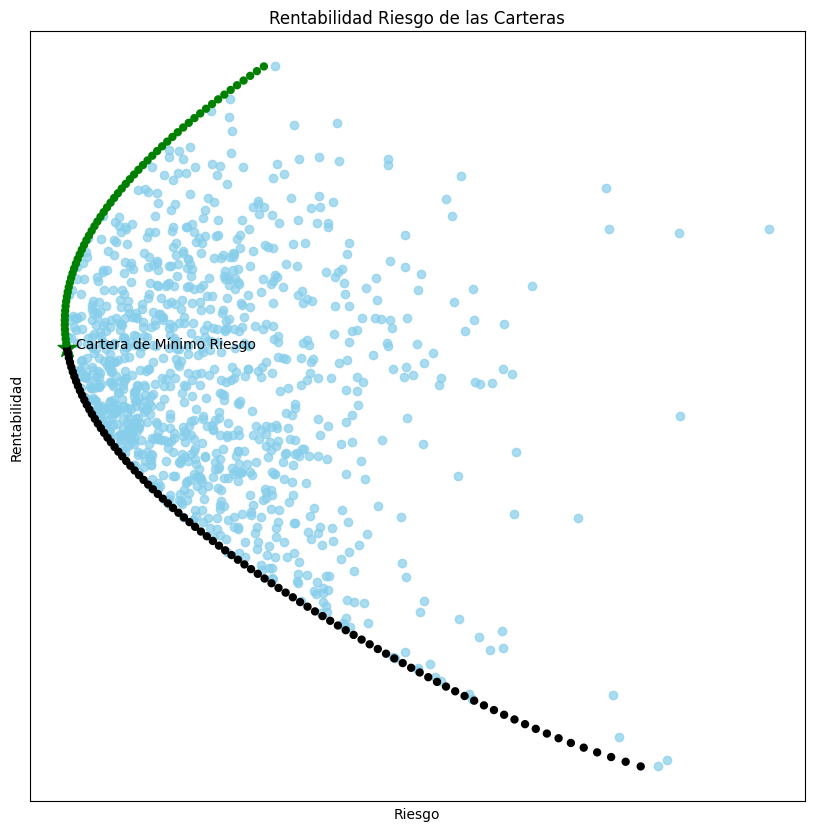

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

ret_medio=datarend.mean()
ret_covar=datarend.cov()

#Simulamos n Uniformes(0,1):
n=4
pesos=np.random.rand(1000,n)
pesos = pesos / pesos.sum(axis=1, keepdims=True)

#Para cada simulación de pesos vemos la rentabilidad y volatilidad de la cartera
rentcarteras=pesos@ret_medio[0:n]*100
volatilidades = []
for i in pesos:
  vol=i@ret_covar.iloc[:n,:n]@i.T
  vol = np.sqrt(vol)
  volatilidades.append(vol*100)
data = pd.DataFrame({'volatilidad': volatilidades, 'rentabilidad': rentcarteras})


# Vamos a encontrar la frontera eficiente
n_bins=150
bins = np.linspace(data['rentabilidad'].min(), data['rentabilidad'].max(), n_bins)
risk_data = np.zeros(n_bins)
ret_data = np.zeros(n_bins)
w = cp.Variable(n)
medias=np.array(ret_medio[0:n].values).reshape(n,1)
covares=np.array(ret_covar.values[:n,:n])

risk = cp.quad_form(w, covares)
gamma = cp.Parameter()
prob = cp.Problem(cp.Minimize(risk), [cp.sum(w) == 1, w >= 0,w.T@medias==gamma])

for i in range(n_bins):
  gamma.value=bins[i]/100
  prob.solve()
  ret_data[i] = bins[i]
  risk_data[i]=risk.value**0.5*100


# Identificar la cartera con el máximo rendimiento
max_return_index = np.argmax(rentcarteras)
max_return_portfolio = pesos[max_return_index]

# Identificar la cartera con la mínima volatilidad
min_volatility_index = np.argmin(volatilidades)
min_volatility_portfolio = pesos[min_volatility_index]
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.scatter(volatilidades,rentcarteras , color='skyblue', alpha=0.7)

plt.scatter(volatilidades[min_volatility_index], rentcarteras[min_volatility_index], c='green', marker='*', s=200, label="Mínima Volatilidad")
plt.text(volatilidades[min_volatility_index] + 0.005,  # Ajuste en X
         rentcarteras[min_volatility_index],          # Ajuste en Y
         "Cartera de Mínimo Riesgo", color='Black', fontsize=10)

colors = ['green' if ret > rentcarteras[min_volatility_index] else 'black' for ret in ret_data]
plt.scatter(risk_data, ret_data, color=colors, lw=3,marker='.', label='Frontera Eficiente')
# Destacar la cartera con mínima volatilidad

axes.set_title('Rentabilidad Riesgo de las Carteras')
axes.set_xlabel('Riesgo')
axes.set_ylabel('Rentabilidad')
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y
plt.show()


En el conjunto de oportunidades de inversión vemos que hay carteras que van a dominar claramente a otras y en las que no tendría sentido invertir. Por ejemplo existen varias carteras con el mismo nivel de riesgo y de todas ellas sólo sería óptimo invertir de entre ellas en la de mayor rentabilidad. Esto da lugar a lo que se conoce como **Frontera Eficiente de Inversión** que es la línea que contiene las carteras de máxima rentabilidad por nivel de riesgo o de mínimo riesgo por nivel de volatilidad.

¿Qué ocurre si añadimos al análisis un activo libre de riesgo con rentabilidad $r_l$ y  volatilidad 0?

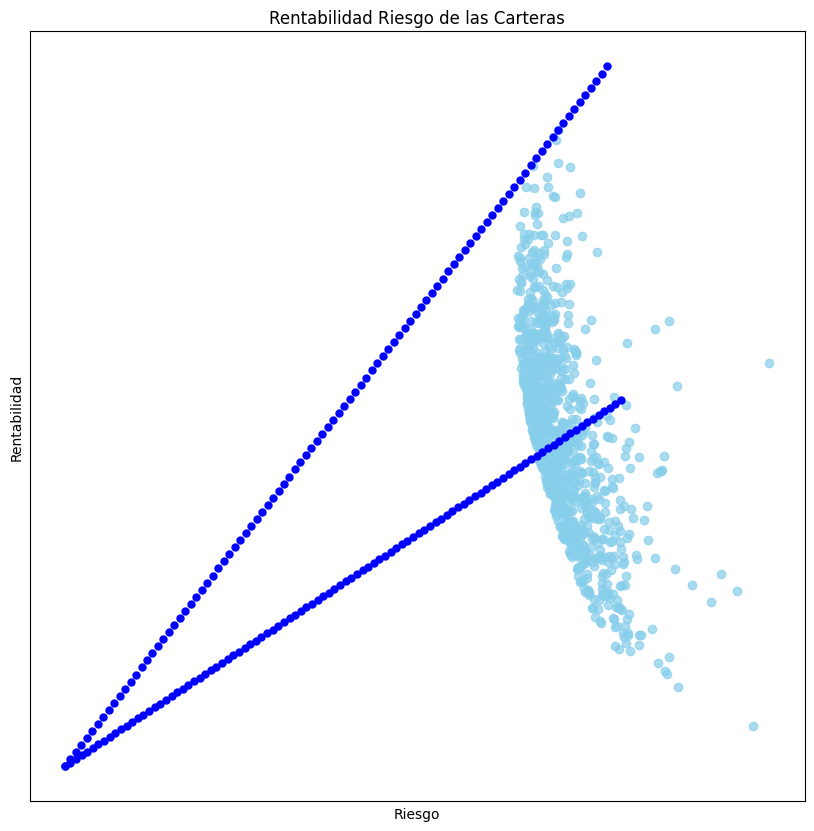

In [ ]:
# @title
#Simulamos n Uniformes(0,1):
rf=0.02/250
ret_medio=datarend.mean()
ret_covar=datarend.cov()

#Simulamos n Uniformes(0,1):
n=4
ret_medio=rf+0.005/250*np.random.rand(n)
pesos=np.random.rand(1000,n)
pesos = pesos / pesos.sum(axis=1, keepdims=True)

#Para cada simulación de pesos vemos la rentabilidad y volatilidad de la cartera
rentcarteras=pesos@ret_medio*100
volatilidades = []
sharpes=[]
for i in pesos:
  vol=i@ret_covar.iloc[:n,:n]@i.T
  vol = np.sqrt(vol)
  volatilidades.append(vol*100)

data = pd.DataFrame({'volatilidad': volatilidades, 'rentabilidad': rentcarteras})
sharpes=(rentcarteras-rf*100)/volatilidades
# Vamos a encontrar la frontera eficiente
n_bins=100
bins = np.linspace(data['rentabilidad'].min(), data['rentabilidad'].max(), n_bins)
risk_data = np.zeros(n_bins)
ret_data = np.zeros(n_bins)
w = cp.Variable(n)
medias=np.array(ret_medio).reshape(n,1)
covares=np.array(ret_covar.values[:n,:n])

# Identificar la cartera con el máximo sharpe
max_sharpe_index = np.argmax(sharpes)
market_ret=rentcarteras[max_sharpe_index]
vol_market=volatilidades[max_sharpe_index]


fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.scatter(volatilidades,rentcarteras , color='skyblue', alpha=0.7)

# Destacar la cartera con mínima volatilidad

axes.set_title('Rentabilidad Riesgo de las Carteras')
axes.set_xlabel('Riesgo')
axes.set_ylabel('Rentabilidad')

# Vamos a encontrar la frontera eficiente
n_bins=100
bins = np.linspace(0, 110, n_bins)
risk_data = np.zeros(n_bins)
ret_data = np.zeros(n_bins)

for i in range(n_bins):
  z=bins[i]
  ret_data[i] = (rf*(100-z)+z/100*market_ret)
  risk_data[i]=(z)/100*vol_market

plt.scatter(risk_data, ret_data, color='blue', lw=3,marker='.', label='Frontera Eficiente')

for i in range(n_bins):
  z=bins[i]
  ret_data[i] = (rf*(100-z)+z/100*rentcarteras[50])
  risk_data[i]=(z)/100*volatilidades[50]

plt.scatter(risk_data, ret_data, color='blue', lw=3,marker='.', label='Frontera Eficiente')

# Destacar la cartera con mínima volatilidad
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y
plt.show()

Observamos que al introducir el tipo libre de riesgo, la nueva **Frontera Eficiente** se compone de combinaciones del activo libre de riesgo y una determinada cartera que es siempre la misma, denominémosla **cartera de mercado**.

Esta nueva línea de carteras eficientes es caso especial de lo que llamábamos "Capital Allocation Line" y se denomina **Capital Market Line** muestra el **Problema de Separación en 2 Fondos**, que básicamente se reduce a que a la hora de conformar la cartera óptima del inversor se usan los dos portfolios mencionados y que son independencientes del apetito de riesgo de los inversores.

Es en una segunda fase, a la hora de determinar qué combinación exacta de esas dos carteras (activo libre de riesgo y cartera de mercado) es óptima cuando entran en juego las preferencias del inversor.

Se puede mostrar que esa cartera de mercado es aquella que maximiza sharpe. Si recordamos para el tipo libre de riesgo y otro activo la línea que generaban las carteras posibles venía dada por:
$$E(R_{cartera})=r_l+\frac{E(r_a)-r_f}{\sigma_a}\sigma_{cartera}$$
dónde la pendiente de esa recta es:
$$\frac{E(r_a)-r_f}{\sigma_a}$$
es decir el sharpe. Por tanto de todas las combinaciónes de la frontera eficiente sin activo libre de riesgo, será óptima aquella que maximice la pendiente de dicha recta, o lo que es lo mismo, su Sharpe.

Aunque teóricamente esa cartera de mercado es una cartera que incluiría todos los activos financiero o no con valor, a efectos prácitcos suele remitirse a algún benchmark de mercado ponderado por capitalización que represente el valor total que pesa cada activo sobre el valor de mercado del universo invertible.

# Riesgo Diversificable y No Diversificable

- Riesgo sistemático o No Diversificado: son riesgos asociado a factores de mercado que afectan a todos los activos y que por tanto no hay manera de diversificar..
- Riesgo no sistemático: riesgo específico del activo que puede eliminarse mediante diversificación.

Podemos por tanto diferencia el riesgo, o volatilidad en dos terminos:

$$Riesgo Total= Riesgo Sistemático+Riesgo Diversificable$$

En la medida que el riesgo diversificable puede ser eliminado, algunos modelos teóricos asumen que el mismo no es recompensado por el mercado.

Dentro de este marco conceptual, dónde sólo este riesgo es compensado surge el modelo CAPM.

#Capital Asset Pricing Model

El Capital Asset Pricing Model (CAPM) describe la relación entre el riesgo sistemático de un activo y su rendimiento esperado. Fue desarrollado por William Sharpe, John Lintner y Jan Mossin en los años 60 como evolución al modelo de Márkowitz.

En un activo, dónde identificamos es riesgo no diversificable como el asociado al mercado podríamos asumir ver qué parte de ese rendimiento no se asocia a la rentabilidad de ese factor de mercado a través de un modelo de regresión:
$$R_i=r_l+β_i(R_m-Rf)+ϵ_i$$
El componente $ϵ_i$ sería el componente específico del activo no dependiente el mercado y po tanto no correlacionado con este.
Por tanto podríamos descomponer también el riesgo entre:
$$σ_i^2=β_i^2\sigma_M^2+\sigma_{ϵ_i}^2$$

Según hemos visto el modelo asume que esa parte no se remuneraría por parte del mercado y por tanto, el modelo CAPM establece la siguiente relación entre el rendimiento y su beta:
$$E(R_i)=r_l+β_i(E(R_m)-Rf)$$

Recordemos el concepto de $\beta$, que s la sensibilidad del activo a los movmientode del mercado y se define como:
$$β_i=\frac{cov(R_i,R_M)}{var(R_m)}$$

Supongamos:

- Tasa libre de riesgo = 2%.
- Rendimiento esperado del mercado = 8%.
- Beta del activo  = 1.5.
- El rendimiento esperado del activo es...


Esta relación permite introducir el concepto de **Security Market Line** que es la relación que esxite entre la rentabilidad esperada de un activo y su beta:



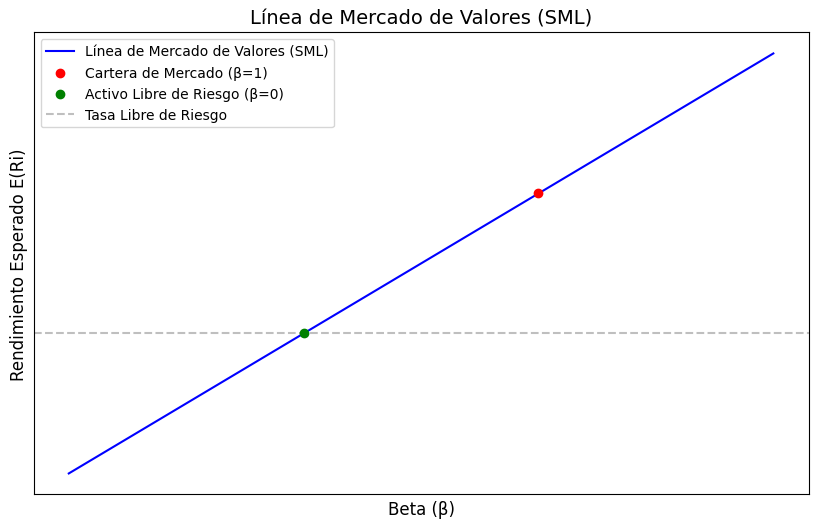

In [ ]:
# @title
# Gráfico del CAPM: Línea de Mercado de Valores (SML)

# Parámetros del modelo CAPM
risk_free_rate = 0.02  # Tasa libre de riesgo (2%)
market_return = 0.08   # Rendimiento esperado del mercado (8%)

# Betas de ejemplo
betas = np.linspace(-1, 2, 100)  # Valores de beta desde -1 a 2

# Rendimientos esperados según el CAPM
expected_returns = risk_free_rate + betas * (market_return - risk_free_rate)

# Gráfico de la Línea de Mercado de Valores (SML)
plt.figure(figsize=(10, 6))
plt.plot(betas, expected_returns, label="Línea de Mercado de Valores (SML)", color="blue")

# Marcar puntos de interés
plt.scatter([1], [market_return], color="red", label="Cartera de Mercado (β=1)", zorder=5)
plt.scatter([0], [risk_free_rate], color="green", label="Activo Libre de Riesgo (β=0)", zorder=5)

# Personalización del gráfico
plt.title("Línea de Mercado de Valores (SML)", fontsize=14)
plt.xlabel("Beta (β)", fontsize=12)
plt.ylabel("Rendimiento Esperado E(Ri)", fontsize=12)
plt.axhline(risk_free_rate, color="gray", linestyle="--", alpha=0.5, label="Tasa Libre de Riesgo")
plt.legend()

# Mostrar el gráfico
plt.xticks([])  # Eliminar datos del eje X
plt.yticks([])  # Eliminar datos del eje Y
plt.show()

Algunas de las limitaciones más evidentes del modelo son:
- Asume que es un único factor de mercado el que determina el nivel de riesgo sistemático sujeto a compensación y que la beta refleja totalmente este riesgo.
- La cartera de mercado a nivel teórico incluiría todos los activos suceptibles de inversión, financiero o no. Esto a nivel práctico es difícilmente observable. Es por ello que en términos prácticos se asume un índice financiero como "proxy" de esa cartera de mercado.
- Empíricamente, el CAPM no predice bien los retornos futuros. Aunque el modelo sugiere que los retornos dependen únicamente del riesgo sistemático, las pruebas muestran que otros factores también influyen.


#Arbitrage Pricing Theory -APT
Es una extensión del modelo CAPM desarrollada por Stephen Ross en 1976 Proporciona una forma más flexible de estimar los retornos esperados de los activos, al permitir que múltiples factores económicos y específicos del mercado influyan en los rendimientos.

El APT asume que el retorno esperado de un activo se puede modelar como una combinación lineal de varios factores de riesgo y las correspondientes betas del activo a los mismos:

$$E(R_i)=r_l+β_{i1}λ_1+β_{i2}λ_2+β_{i3}λ_3++...+β_{in}λ_n$$

dónde:
- $β_{ik}$= la beta del activo al factor de riesgo K.
- $\lambda_k$= la prima de riesgo del factor K (Rentabilidad sobre el tipo libre de riesgo)

Este modelo teórico no prescribe cuáles deben ser los factores y por tanto en términos prácticos es más una referencia que un modelo específico.

Si existen ejercicios prácticos que tratan de determinar cuáles podrían ser esos factores suceptibles de ser remunerados por el mercado y que permitan predecir sus activos. Algunos de los más reconocidos son:

#FAMA-FRENCH MODEL

El modelo de Fama-French amplía el **CAPM** al incluir factores adicionales para explicar los rendimientos esperados de los activos:


$E(R_i) = r_f + \beta_m (E(R_m) - r_f) + \beta_\text{SMB} \cdot \text{SMB} + \beta_\text{HML} \cdot \text{HML}$

Donde:
- $E(R_i)$: Retorno esperado del activo $i$.
- $r_f$: Tasa libre de riesgo.
- $(E(R_m) - r_f)$: Prima de riesgo del mercado.
- $\beta_m$: Sensibilidad del activo al mercado.
- $\beta_\text{SMB}$: Sensibilidad al factor SMB.
- $\beta_\text{HML}$: Sensibilidad al factor HML.
- $\text{SMB}$: Diferencia entre los retornos de empresas pequeñas y grandes.
- $\text{HML}$: Diferencia entre los retornos de empresas con alto y bajo valor libro/mercado.


#CARHART MODEL
El modelo de **Carhart**, también conocido como modelo de cuatro factores, extiende el modelo de **Fama-French** añadiendo un cuarto factor relacionado con el **momento** de los activos. Este modelo se utiliza para analizar los rendimientos esperados de los activos teniendo en cuenta factores como mercado, tamaño, valor y momento.

## Fórmula del Modelo

$E(R_i) = r_f + \beta_m (E(R_m) - r_f) + \beta_\text{SMB} \cdot \text{SMB} + \beta_\text{HML} \cdot \text{HML} + \beta_\text{MOM} \cdot \text{MOM}$

Donde:
- $E(R_i)$: Retorno esperado del activo $i$.
- $r_f$: Tasa libre de riesgo.
- $(E(R_m) - r_f)$: Prima de riesgo del mercado.
- $\beta_m$: Sensibilidad del activo al mercado.
- $\beta_\text{SMB}$: Sensibilidad al factor SMB (Small Minus Big).
- $\beta_\text{HML}$: Sensibilidad al factor HML (High Minus Low).
- $\beta_\text{MOM}$: Sensibilidad al factor de momento.
- $\text{MOM}$: Diferencia entre los retornos de activos con alto y bajo momento.

## Explicación de los Factores

1. **Factor de mercado ($(E(R_m) - r_f)$):**
   - Similar al CAPM, mide el exceso de retorno del mercado.

2. **SMB (Small Minus Big):**
   - Mide el efecto del tamaño, comparando los retornos de empresas pequeñas con los de empresas grandes.

3. **HML (High Minus Low):**
   - Captura el efecto valor, midiendo la diferencia entre empresas con alto y bajo valor libro/mercado.

4. **MOM (Momentum):**
   - Introducido por Mark Carhart, este factor mide la tendencia de los activos que han tenido buenos rendimientos en el pasado reciente a seguir superando a los activos con rendimientos más bajos.

#FACTOR INVESTING AND SMART BETA

A partir de estas ideas se ha popularizado usar estos factores para desarrollar índices y prodcutos que por una parte presentan una prima de rentabilidad de acuerdo con los modelos teóricos y descorrelaciones con la beta de mercado tradicional.

En 1998 Andrew Ang, , William Goetzmann, y Stephen Schaefer publican un análisis de la gestión activa del Fondo de Pensiones del Gobierno de Noruega y atribuyen el 70% de su performance (alfa) a su exposición a factores y no tanto a la habilidad real de los gestor. Este informe supone un resvulsivo en el uso de factores en el ámbito de la inversión.

El uso de factores se populariza y surgen como una opción de inversión a caballo entre la gestión activo y gestión pasiva.

In [ ]:
# @title
from IPython.display import Image, display

# URL de la imagen
url = "https://www.blackrock.com/apac-retail-c-assets/cache-1704422218000/images/media-bin/web/retail/apac/au/ishares/goals-and%20solutions-factor-investing.png"

# Mostrar la imagen
display(Image(url=url,width=1000, height=600))

¿Qué condiciones debe cumplir un factor?
- Rentable: debe generar una prima de riesgo relevante ajustada por riesgo.
Comprobado: estar testado académicamente y en la práctica.
- Persistente: Es observable en diferentes mercados, estable a lo largo del tiempo y robusto frente a distintas definiciones.
- Explicable: Tiene una lógica económica respaldada por fundamentos académicos sólidos.
- Implementable: se puede invertir en la práctica teniendo en cuenta las limitaciones y costes de operar en los mercados.

Algunos de los factores más tradicionales son:

- **Valor (Value):**

Busca acciones con precios bajos en relación con su valor fundamental, definido comúnmente por: Relación precio/valor en libros, precio/beneficio, valor en libros/ventas, ganancias, flujo de caja, dividendos, beneficios netos...

- **Tamaño Reducido (Small Size o Small Cap):**

Busca invertir en empresas más pequeñas (por capitalización de mercado) bajo la premisa de que ofrecen una prima en comparación con sus contrapartes más grandes.
Como métrica de filtrado se usa la capitalización de mercado (total o flotante libre).

- **Momento (Momentum):**

Invierte en compañías cuya cotización o precio viene siendo positivo con la idea de que esa tendencia tiende a continuar el el tiempo y por tanto genera una prima. La definición de momentum se captura observando los rendimientos de los últimos meses (3 meses, 6 meses, 12 meses, a veces excluyendo el mes más reciente para evitar "reversal" en precio), alfa histórico....

- **Volatilidad Baja (Low Volatility):**

Captura los rendimientos excedentes de acciones con menor volatilidad promedio, beta o riesgo idiosincrático.
Capturado comúnmente por: Desviación estándar (1 año, 2 años, 3 años), desviación estándar a la baja, desviación del riesgo idiosincrático, beta.

- **Rendimiento por Dividendos (Dividend Yield):**

Captura los rendimientos excedentes de acciones con un rendimiento por dividendos superior al promedio.
Capturado comúnmente por: Rendimiento por dividendos.

- **Calidad (Quality):**

Captura los rendimientos excedentes de acciones caracterizadas por baja deuda, ganancias estables y otras métricas de "calidad".
Capturado comúnmente por: ROE (rendimiento sobre capital), estabilidad de ganancias, tasa de crecimiento de dividendos, solidez financiera, apalancamiento, métricas contables, fuerza de la gestión, acumulación, flujo de caja.


Si bien los factores surgen en el ámbito del equity a día de hoy se han investigado en diversas clases de activos: renta fija, crédito, commodities...

Hay que tener en cuenta que esos
Dado el incremento de popularidad, además de la búsqueda de nuevos factores se han desarrollados múltiples implementaciones de los factores tradicionales.
Todo lo anterior a dado lugar a lo que se denomina Factor Zoo y al debate sobre la validez de los propios factores.


